<a href="https://colab.research.google.com/github/NORMTOSH/Understanding-Road-Accidents/blob/main/Hotspot_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.io import templates

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Our data set
file_url = 'https://drive.google.com/file/d/1-Nh6rlsdkiCo_36km3iJNXt5dbZyLwQN/view?usp=drive_link'

# Extract the file ID from the URL
file_id = file_url.split('/')[-2]

# Construct the download URL for the file
download_url = 'https://drive.google.com/uc?id=' + file_id

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
df.head()

,Age,Base/Sub Base,Brief Accident Details,Cause Code,County,Date,Gender,Mv Involved,No.,Place,Road,Time 24 Hours,Victim
0,26.0,KITUI,HEAD ON COLLISION,7.0,MAKUENI,2016-06-25,M,NaN,1.0,KITUI SCHOOL,KITUI-ITHOKWE,630.0,M/CYCLIST
1,28.0,VOI,HEAD ON COLLISION,25.0,TAITA TAVETA,2016-06-25,M,NaN,1.0,IKANGA,MOMBASA-NAIROBI,830.0,M/CYCLIST
2,A & J,MARIAKANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,98.0,KILIFI,2016-06-25,M,NaN,1.0,KATOLANI,MOMBASA-NAIROBI,1330.0,M/CYCLIST
3,65.0,ONGATA RONGAI,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,29.0,NAKURU,2016-06-25,M,NaN,1.0,MAASAI LODGE,NAKURU-NAIROBI,2100.0,PEDESTRIAN
4,A,MATUU,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,10.0,MACHAKOS,2016-06-25,M,NaN,1.0,KIVANDINI,MATUU-MWINGI,1900.0,PASSENGER


In [3]:
df.shape

(1385, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1384 non-null   object 
 1   Base/Sub Base           1383 non-null   object 
 2   Brief Accident Details  1384 non-null   object 
 3   Cause Code              1345 non-null   float64
 4   County                  1382 non-null   object 
 5   Date                    1385 non-null   object 
 6   Gender                  1385 non-null   object 
 7   Mv Involved             1007 non-null   object 
 8   No.                     1380 non-null   float64
 9   Place                   1371 non-null   object 
 10  Road                    1377 non-null   object 
 11  Time 24 Hours           1301 non-null   float64
 12  Victim                  1385 non-null   object 
dtypes: float64(3), object(10)
memory usage: 140.8+ KB


 Summary of information about the DataFrame, including the number of non-null entries, data types of each column, and memory usage. This is useful for understanding the structure of your data and identifying any missing values.

In [5]:
# Statistical summary on numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cause Code,1345.0,46.730855,33.389973,0.0,16.0,35.0,72.0,99.0
No.,1380.0,1.189130,0.930366,1.0,1.0,1.0,1.0,18.0
Time 24 Hours,1301.0,1442.836280,635.170848,0.0,930.0,1610.0,2000.0,2355.0


In [6]:
# Statistical summary on categorical features(Object)
df.describe(include=['O'])

,Age,Base/Sub Base,Brief Accident Details,County,Date,Gender,Mv Involved,Place,Road,Victim
count,1384,1383,1384,1382,1385,1385,1007,1371,1377,1385
unique,120,238,583,61,208,22,889,1256,843,63
top,A,NAKURU,THE VEHICLE KNOCKED DOWN THE VICTIM,NAIROBI,2017-08-27,M,UNKNOWN,MALTAURO,NAIROBI MOMBASA,PEDESTRIAN
freq,652,36,281,229,22,1153,53,3,31,564


 Summary statistics for all the object (string) columns in your DataFrame, including count (number of non-null values), unique (number of unique values), top (most common value), and freq (frequency of the most common value) for each object column.

In [7]:
df.isnull().sum()

Age                         1
Base/Sub Base               2
Brief Accident Details      1
Cause Code                 40
County                      3
Date                        0
Gender                      0
Mv Involved               378
No.                         5
Place                      14
Road                        8
Time 24 Hours              84
Victim                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Age', 'Base/Sub Base', 'Brief Accident Details', 'Cause Code',
       'County', 'Date', 'Gender', 'Mv Involved', 'No.', 'Place', 'Road',
       'Time 24 Hours', 'Victim'],
      dtype='object')

# EDA

### Overall Trend in the Number of Road Accidents Over Time:

In [10]:
# Assuming you have a datetime column 'Date' in your DataFrame
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group accidents by year and count the number of accidents per year
accidents_by_year = df.groupby(df['Date'].dt.year)['No.'].count()

# Assuming 'Date' column is a datetime object
df['Year'] = df['Date'].dt.year
accidents_over_time = df.groupby('Year').size().reset_index(name='Accident Count')

fig = px.line(accidents_over_time, x='Year', y='Accident Count', title='Accidents Over Time')
fig.show()


The year 2017 had the highest number of 807 accidents followed by 2016 with 378 accidents and then 2018 with 200 accidents.

### Most Common Causes of Road Accidents:

In [11]:
common_causes = df['Cause Code'].value_counts().reset_index()
common_causes.columns = ['Cause Code', 'Count']

fig = px.bar(common_causes, x='Cause Code', y='Count', title='Common Causes of Accidents', labels={'Cause Code': 'Cause', 'Count': 'Count'})
fig.show()


### Age Distribution of Individuals Involved in Accidents:

In [12]:
fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution of Individuals Involved in Accidents')
fig.show()

### Gender Distribution of Accident Victims:**bold text**

In [13]:
gender_distribution = df['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

fig = px.pie(gender_distribution, names='Gender', values='Count', title='Gender Distribution of Accident Victims')
fig.show()


## Temporal Analysis:

### Patterns by Day of the Week:

In [14]:
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group accidents by day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()

fig = px.bar(day_of_week_counts, x=day_of_week_counts.index, y=day_of_week_counts.values,
             labels={'x':'Day of the Week', 'y':'Number of Accidents'},
             title='Accidents by Day of the Week',
             template='plotly_dark',  # Dark theme for the plot
             color_discrete_sequence=['skyblue'],  # Customize the bar color
             opacity=0.7,  # Set opacity for bars
             text=day_of_week_counts.values,  # Display the exact counts on top of bars
             )

# Customize the layout
fig.update_xaxes(title_text='Day of the Week')
fig.update_yaxes(title_text='Number of Accidents')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()


### Influence of Time of Day:

In [15]:
# Initialize a new column to store the parsed time
df['Parsed Time'] = None

# Iterate over each row and attempt to parse the time
for index, row in df.iterrows():
    try:
        # Try parsing as HHMM format
        df.at[index, 'Parsed Time'] = pd.to_datetime(row['Time 24 Hours'], format='%H%M').time()
    except ValueError:
        try:
            # Try parsing as HH:MM format
            df.at[index, 'Parsed Time'] = pd.to_datetime(row['Time 24 Hours'], format='%H:%M').time()
        except ValueError:
            # Handle invalid time format as needed
            df.at[index, 'Parsed Time'] = None  # Or set a default value

# Drop the original 'Time 24 Hours' column if needed
df.drop('Time 24 Hours', axis=1, inplace=True)

# Extract the hour of the day
df['Hour'] = df['Parsed Time'].apply(lambda x: x.hour if x is not None else None)

df.head()

,Age,Base/Sub Base,Brief Accident Details,Cause Code,County,Date,Gender,Mv Involved,No.,Place,Road,Victim,Year,DayOfWeek,Parsed Time,Hour
0,26.0,KITUI,HEAD ON COLLISION,7.0,MAKUENI,2016-06-25,M,NaN,1.0,KITUI SCHOOL,KITUI-ITHOKWE,M/CYCLIST,2016,Saturday,06:30:00,6.0
1,28.0,VOI,HEAD ON COLLISION,25.0,TAITA TAVETA,2016-06-25,M,NaN,1.0,IKANGA,MOMBASA-NAIROBI,M/CYCLIST,2016,Saturday,08:30:00,8.0
2,A & J,MARIAKANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,98.0,KILIFI,2016-06-25,M,NaN,1.0,KATOLANI,MOMBASA-NAIROBI,M/CYCLIST,2016,Saturday,13:30:00,13.0
3,65.0,ONGATA RONGAI,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,29.0,NAKURU,2016-06-25,M,NaN,1.0,MAASAI LODGE,NAKURU-NAIROBI,PEDESTRIAN,2016,Saturday,21:00:00,21.0
4,A,MATUU,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,10.0,MACHAKOS,2016-06-25,M,NaN,1.0,KIVANDINI,MATUU-MWINGI,PASSENGER,2016,Saturday,19:00:00,19.0


In [16]:
df.shape

(1385, 16)

In [17]:
# Group accidents by hour of the day
hourly_counts = df['Hour'].value_counts().sort_index()

# Create a bar chart with customizations
fig = px.bar(hourly_counts, x=hourly_counts.index, y=hourly_counts.values,
             labels={'x': 'Hour of the Day', 'y': 'Number of Accidents'},
             title='Accidents by Time of Day',
             template='plotly_dark',  # Dark theme for the plot
             color_discrete_sequence=['skyblue'],  # Customize the bar color
             opacity=0.7,  # Set opacity for bars
             text=hourly_counts.values,  # Display the exact counts on top of bars
             )

# Customize the layout
fig.update_xaxes(title_text='Hour of the Day', tickvals=list(range(24)), ticktext=[f"{hour:02d}:00" for hour in range(24)])
fig.update_yaxes(title_text='Number of Accidents')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

### Seasonal Variations:

In [18]:
df['YearMonth'] = df['Date'].dt.to_period('M')

# Convert YearMonth to string
df['YearMonthStr'] = df['YearMonth'].dt.strftime('%Y-%m')

# Group accidents by month
monthly_counts = df['YearMonthStr'].value_counts().sort_index()

fig = px.line(monthly_counts, x=monthly_counts.index, y=monthly_counts.values,
              labels={'x':'Month', 'y':'Number of Accidents'},
              title='Monthly Accident Trends')
fig.show()

### Are there any common factors that contribute to accidents?

In [19]:
# Group by 'Cause Code' (common factors) and count the number of accidents for each cause
cause_counts = df['Cause Code'].value_counts().reset_index()
cause_counts.columns = ['Cause Code', 'Accident Count']

# Create a bar chart
fig = px.bar(cause_counts, x='Cause Code', y='Accident Count', title='Common Factors Contributing to Accidents')
fig.show()


### Correlation between Vehicles Involved and Severity:

In [20]:
# Create a scatter plot to show the correlation
fig = px.scatter(df, x='No.', y='Brief Accident Details', title='Correlation between Vehicles Involved and Severity')
fig.show()

### Age and Gender Analysis:

In [21]:
# Grouping the data by age and gender and counting the number of accidents
age_gender_counts = df.groupby(['Age', 'Gender']).size().reset_index(name='Accident Count')

# Creating a scatter plot to visualize the impact of age and gender on accidents
fig_age_gender = px.scatter(
    age_gender_counts,
    x='Age',
    y='Accident Count',
    color='Gender',
    title='Impact of Age and Gender on Accidents',
    labels={'Age': 'Age of Victim', 'Accident Count': 'Number of Accidents'},
    template='plotly_white'
)

fig_age_gender.show()


## Comparative Analysis

Are there differences in accident causes between different counties?

In [22]:
fig = px.histogram(df, x='County', color='Cause Code', title='Accident Causes by County')
fig.show()


In [23]:
# Grouping by 'Victim' and 'Place' and counting occurrences
grouped_df = df.groupby(['Victim', 'Place']).size().reset_index(name='Count')

# Creating a bar chart using Plotly Express
fig = px.scatter(grouped_df, x='Place', y='Count', color='Victim', title='Accident Counts by Victim and Place')
fig.show()

## Encoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     1384 non-null   object        
 1   Base/Sub Base           1383 non-null   object        
 2   Brief Accident Details  1384 non-null   object        
 3   Cause Code              1345 non-null   float64       
 4   County                  1382 non-null   object        
 5   Date                    1385 non-null   datetime64[ns]
 6   Gender                  1385 non-null   object        
 7   Mv Involved             1007 non-null   object        
 8   No.                     1380 non-null   float64       
 9   Place                   1371 non-null   object        
 10  Road                    1377 non-null   object        
 11  Victim                  1385 non-null   object        
 12  Year                    1385 non-null   int64   

In [25]:
categorical_features = df.select_dtypes(include=['object'])

# Display the list of categorical features
print(categorical_features.columns)
print('-'*100)
print('Data data shape:', df.shape)

Index(['Age', 'Base/Sub Base', 'Brief Accident Details', 'County', 'Gender',
       'Mv Involved', 'Place', 'Road', 'Victim', 'DayOfWeek', 'Parsed Time',
       'YearMonthStr'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Data data shape: (1385, 18)


In [26]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}  # Dictionary to store fitted LabelEncoders for each column

# Fit LabelEncoder on the training data
for column in categorical_features:
    le = LabelEncoder()
    le.fit(df[column])  # Fit on the column data
    le_dict[column] = le  # Store the fitted LabelEncoder

# Transform the data using fitted LabelEncoders
encoded_data = df.copy()

for column, le in le_dict.items():
    encoded_data[column] = le.transform(encoded_data[column])

# Now 'encoded_data' contains the transformed data with encoded categorical columns
encoded_data.head()

,Age,Base/Sub Base,Brief Accident Details,Cause Code,County,Date,Gender,Mv Involved,No.,Place,Road,Victim,Year,DayOfWeek,Parsed Time,Hour,YearMonth,YearMonthStr
0,30,101,10,7.0,26,2016-06-25,12,889,1.0,491,359,20,2016,2,28,6.0,2016-06,1
1,33,231,10,25.0,48,2016-06-25,12,889,1.0,273,525,20,2016,2,43,8.0,2016-06,1
2,111,127,365,98.0,17,2016-06-25,12,889,1.0,388,525,20,2016,2,85,13.0,2016-06,1
3,91,186,418,29.0,40,2016-06-25,12,889,1.0,570,621,47,2016,2,156,21.0,2016-06,1
4,109,132,503,10.0,25,2016-06-25,12,889,1.0,494,478,41,2016,2,136,19.0,2016-06,1


In [27]:
encoded_data.shape

(1385, 18)

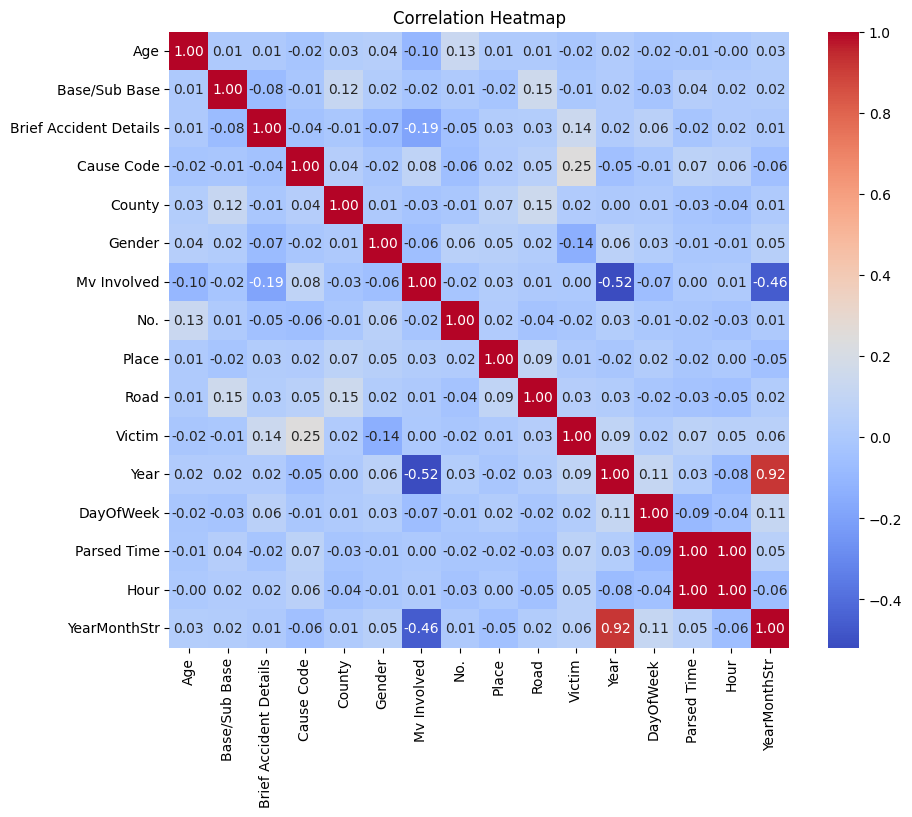

In [28]:
# Create a correlation matrix
correlation_matrix = encoded_data.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()